In [7]:
# Step 1 — Extract ZIP and Load Excel File

import zipfile
import pandas as pd

zip_path = r"C:\Users\Preetika\OneDrive\Desktop\Telco_customer_churn.xlsx.zip"
extract_path = r"C:\Users\Preetika\OneDrive\Desktop\churn_extracted"

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

# Load Excel file (the one inside the ZIP)
df = pd.read_excel(extract_path + r"\Telco_customer_churn.xlsx")


In [8]:
df.shape
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.info()
df['Churn Label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# Step 2 — Basic Cleaning

# Drop columns not needed for churn analysis
cols_to_drop = ['Country', 'State', 'City', 'Zip Code', 'Lat Long', 
                'Latitude', 'Longitude']

df = df.drop(columns=cols_to_drop)

# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Fill missing Total Charges with 0
df['Total Charges'] = df['Total Charges'].fillna(0)


In [11]:
# Step 3 — Basic EDA

# Churn distribution
df['Churn Label'].value_counts()

# Churn % by Contract Type
df.groupby('Contract')['Churn Label'].value_counts(normalize=True)

# Churn % by Payment Method
df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True)

# Churn vs Monthly Charges (basic stats)
df.groupby('Churn Label')['Monthly Charges'].describe()

# Churn vs Tenure Months (basic stats)
df.groupby('Churn Label')['Tenure Months'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [ ]:
#STEP 4 — Visual EDA (Key Plots)

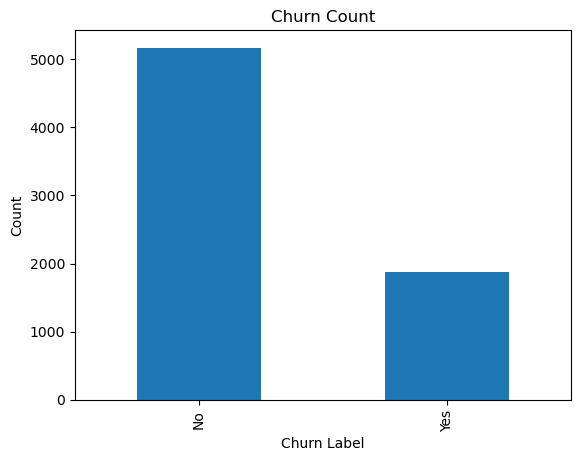

In [12]:
#4.1 Churn Count Plot

import matplotlib.pyplot as plt

df['Churn Label'].value_counts().plot(kind='bar')
plt.title("Churn Count")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.show()


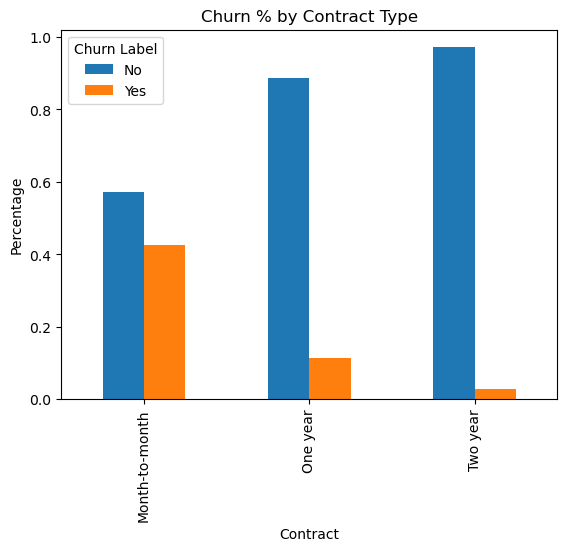

In [13]:
#4.2 Churn by Contract Type

df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title("Churn % by Contract Type")
plt.ylabel("Percentage")
plt.show()


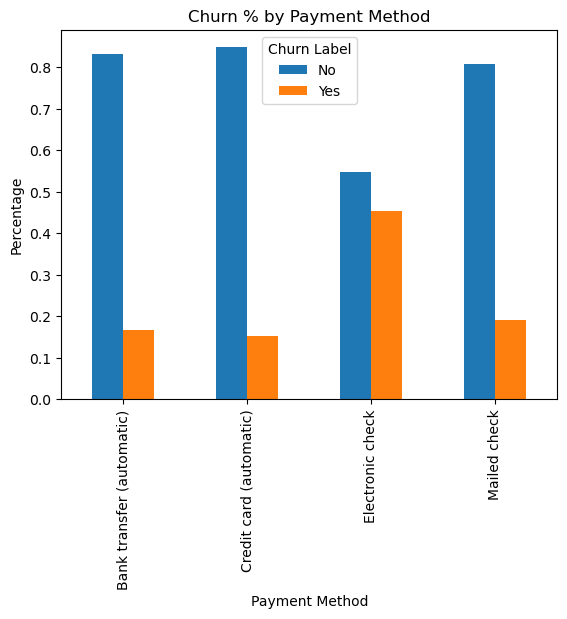

In [14]:
#4.3 Churn by Payment Method

df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title("Churn % by Payment Method")
plt.ylabel("Percentage")
plt.show()


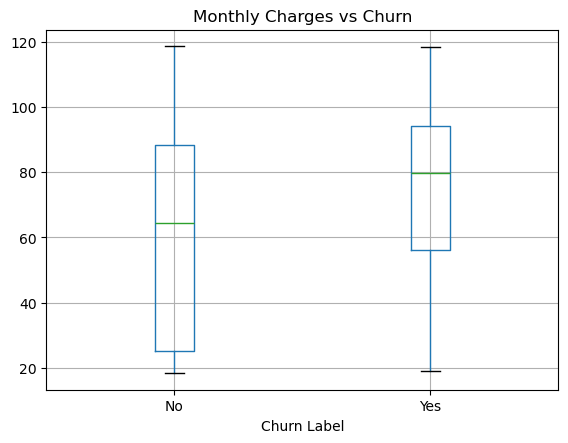

In [15]:
#4.4 Monthly Charges — Churn vs Not Churn

df.boxplot(column='Monthly Charges', by='Churn Label')
plt.title("Monthly Charges vs Churn")
plt.suptitle("")  
plt.show()


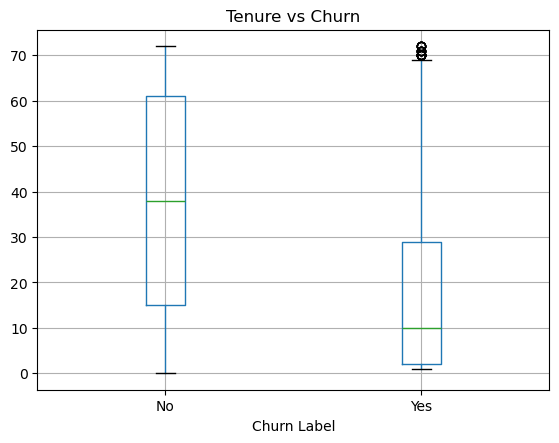

In [16]:
#4.5 Tenure — Churn vs Not Churn

df.boxplot(column='Tenure Months', by='Churn Label')
plt.title("Tenure vs Churn")
plt.suptitle("")
plt.show()


In [ ]:
## Step 5 — Key Insights

1. Overall churn rate is high (26.5%).
2. Month-to-month customers have the highest churn percentage.
3. Customers paying through Electronic Check churn more than other methods.
4. Customers with higher Monthly Charges show higher churn.
5. Low-tenure customers (new customers) are the most likely to churn.


In [17]:
df.to_csv("cleaned_telco_churn.csv", index=False)
